In [1]:
%pip install prophet
# Prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.7/922.7 kB 9.1 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('energydata_complete.csv')
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
m = Prophet()
new_df = df[['date', 'RH_5']].copy()


new_df.columns = ['ds', 'y']
m.fit(new_df)



23:20:12 - cmdstanpy - INFO - Chain [1] start processing
23:20:14 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
import numpy as np
n = 60
res = pd.qcut(new_df['y'], n, labels=False, retbins=True, precision=3, duplicates='raise')
# do equal-depth p
xs = np.array(list(res[0]))
bins = res[1]

In [29]:
from prophet.diagnostics import cross_validation


In [31]:
df_cv = cross_validation(m, initial='15 days', period='1 days', horizon = '10 minutes')


  0%|          | 0/123 [00:00<?, ?it/s]

13:56:52 - cmdstanpy - INFO - Chain [1] start processing
13:56:52 - cmdstanpy - INFO - Chain [1] done processing
13:56:52 - cmdstanpy - INFO - Chain [1] start processing
13:56:52 - cmdstanpy - INFO - Chain [1] done processing
13:56:52 - cmdstanpy - INFO - Chain [1] start processing
13:56:52 - cmdstanpy - INFO - Chain [1] done processing
13:56:52 - cmdstanpy - INFO - Chain [1] start processing
13:56:52 - cmdstanpy - INFO - Chain [1] done processing
13:56:53 - cmdstanpy - INFO - Chain [1] start processing
13:56:53 - cmdstanpy - INFO - Chain [1] done processing
13:56:53 - cmdstanpy - INFO - Chain [1] start processing
13:56:53 - cmdstanpy - INFO - Chain [1] done processing
13:56:53 - cmdstanpy - INFO - Chain [1] start processing
13:56:53 - cmdstanpy - INFO - Chain [1] done processing
13:56:53 - cmdstanpy - INFO - Chain [1] start processing
13:56:54 - cmdstanpy - INFO - Chain [1] done processing
13:56:54 - cmdstanpy - INFO - Chain [1] start processing
13:56:54 - cmdstanpy - INFO - Chain [1]

In [32]:
print(df_cv['y'] - df_cv['yhat'])


predict_dct = np.digitize(df_cv['yhat'], bins, right=False)
truth_dct = np.digitize(df_cv['y'], bins, right=False)
print(predict_dct- truth_dct)


0      6.293551
1      0.530492
2      5.479218
3      2.523990
4     -0.780469
         ...   
118    1.708083
119   -3.077055
120    3.263609
121    0.925612
122    4.003898
Length: 123, dtype: float64
[-24  -1 -21  -9   1   1   3  11   4 -12   1   5   8   9   4 -10   8  -8
   2   4  13   9  17  -6 -15 -39 -29 -26 -14  21   3  16  25  28  14  -3
   1 -15 -13 -12   5 -15 -22   7  -6  -2   8  16  -4  -3   4  -1 -12  -3
  12  -1 -15  -4 -13 -20 -25  13  -8 -24   6  -8  -4   0  -2 -26 -12   5
 -16 -10  10  25   1 -11   9   1   5 -14  16   9 -49  14   7   1   6  12
  -1  -3   4   3  -3 -31   7 -39   4   6   2  -9  -3  15  -2 -27 -34 -27
 -40  22  20  10  -1  -5   2 -46 -19 -21  -7  13 -12  -4 -15]


In [26]:
print(19735 / 576)

34.26215277777778


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19740,2016-06-02 18:00:00,49.155125,38.029899,59.092858
19741,2016-06-03 18:00:00,49.467127,39.131056,59.632275
19742,2016-06-04 18:00:00,50.070265,38.894687,59.858583
19743,2016-06-05 18:00:00,51.470180,40.921059,62.049495
19744,2016-06-06 18:00:00,50.251259,39.182843,60.160165


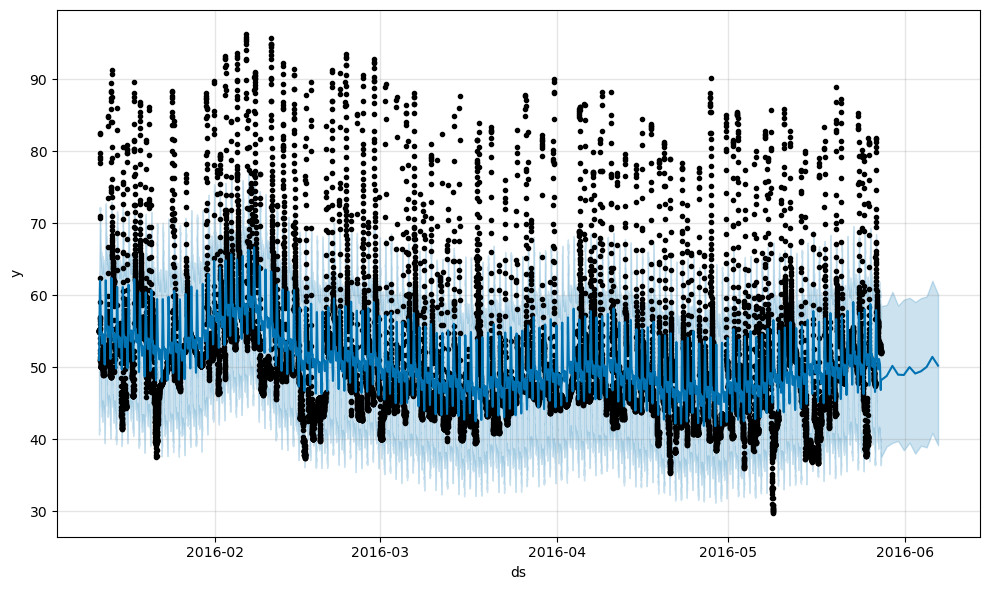

In [15]:
fig1 = m.plot(forecast)